In [2]:
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [46]:
test_data = 'C:/Users/GrIg2/Desktop/предсказание/test.csv'
train_data = 'C:/Users/GrIg2/Desktop/предсказание/исход.csv'

REPORTS_FILE_PATH = 'C:/Users/GrIg2/Desktop/предсказание/reports/'
SCALER_FILE_PATH = 'C:/Users/GrIg2/Desktop/предсказание/models/scaler.pkl'
MODEL_FILE_PATH = 'C:/Users/GrIg2/Desktop/предсказание/models/model.pkl'

In [4]:
df = pd.read_csv(train_data, sep=',')
df.head()

,Unnamed: 0,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,0,11809,27,3.0,52.509275,32.781260,10.0,4.0,10.0,2014,...,900.0,0,0,305018.871089,0,1,0,1,0,1
1,1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,...,1183.0,1,0,177734.553407,0,1,0,1,0,1
2,2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,...,240.0,3,1,282078.720850,0,1,0,1,0,1
3,3,2352,1,1.0,40.409907,32.781260,1.0,10.0,22.0,1977,...,900.0,0,1,168106.007630,0,1,0,1,0,1
4,4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,...,900.0,0,6,343995.102962,0,1,0,1,0,1


In [5]:
df.columns.tolist()

['Unnamed: 0',
 'Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Price',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

In [6]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
                 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
                 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']

target_name = 'Price'

df = df[feature_names + [target_name]]
df.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,3.0,52.509275,32.781260,10.0,4.0,10.0,2014,0.075424,11,3097,...,900.0,0,0,0,1,0,1,0,1,305018.871089
1,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,30,6207,...,1183.0,1,0,0,1,0,1,0,1,177734.553407
2,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,33,5261,...,240.0,3,1,0,1,0,1,0,1,282078.720850
3,1.0,40.409907,32.781260,1.0,10.0,22.0,1977,0.007122,1,264,...,900.0,0,1,0,1,0,1,0,1,168106.007630
4,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,33,8667,...,900.0,0,6,0,1,0,1,0,1,343995.102962


In [7]:
feature_names_for_stand = df[feature_names].select_dtypes(include=['float64', 'int64']).columns.tolist()
feature_names_for_stand

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

In [8]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])
#stand_features
#stand_features.shape

In [19]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [20]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,-0.536633,1.372430,-0.123874,-0.153787,1.093008,-0.697820,-0.580238,-0.009876,-0.365385,-0.782164,...,-0.169125,-0.884336,-0.880977,-0.099165,0.099165,-0.168182,0.168182,-0.29931,0.29931,305018.871089
1,-0.651278,-1.095219,-0.882520,-0.774365,0.585190,-0.131671,-0.920885,-0.010115,-0.003183,0.301856,...,0.209667,-0.214562,-0.880977,-0.099165,0.099165,-0.168182,0.168182,-0.29931,0.29931,177734.553407
2,-1.132786,1.372430,1.422109,0.807595,1.093008,-1.075252,0.612026,-0.010006,-0.783881,0.473017,...,-1.052528,1.124987,-0.672930,-0.099165,0.099165,-0.168182,0.168182,-0.29931,0.29931,282078.720850
3,-1.132786,-1.095219,-0.847966,-0.153787,-1.192176,0.434477,1.463643,-0.010060,-0.939191,-1.352700,...,-0.169125,-0.884336,-0.672930,-0.099165,0.099165,-0.168182,0.168182,-0.29931,0.29931,168106.007630
4,0.999606,0.138605,0.580853,0.219465,0.839099,1.566775,0.441702,-0.010085,1.376781,0.473017,...,-0.169125,-0.884336,0.367303,-0.099165,0.099165,-0.168182,0.168182,-0.29931,0.29931,343995.102962


In [21]:
X = df[feature_names]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [24]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    plt.show()

In [17]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
    # дописать документация
    Выводить R2 и строит графики для оценки качества модели
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

R2:	0.903
RMSE:	28851.903
MSE:	832432287.863


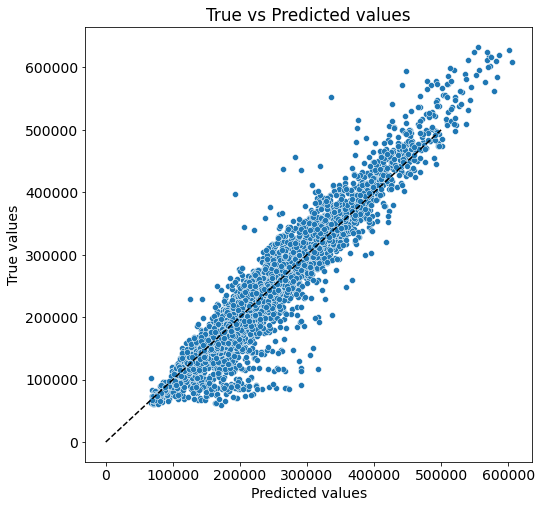

In [32]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=100)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.715
RMSE:	49720.54
MSE:	2472132093.908


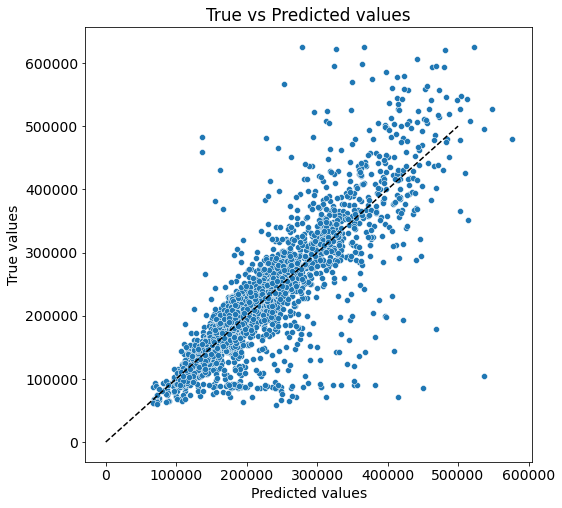

In [33]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

Train R2:	0.895
Test R2:	0.712


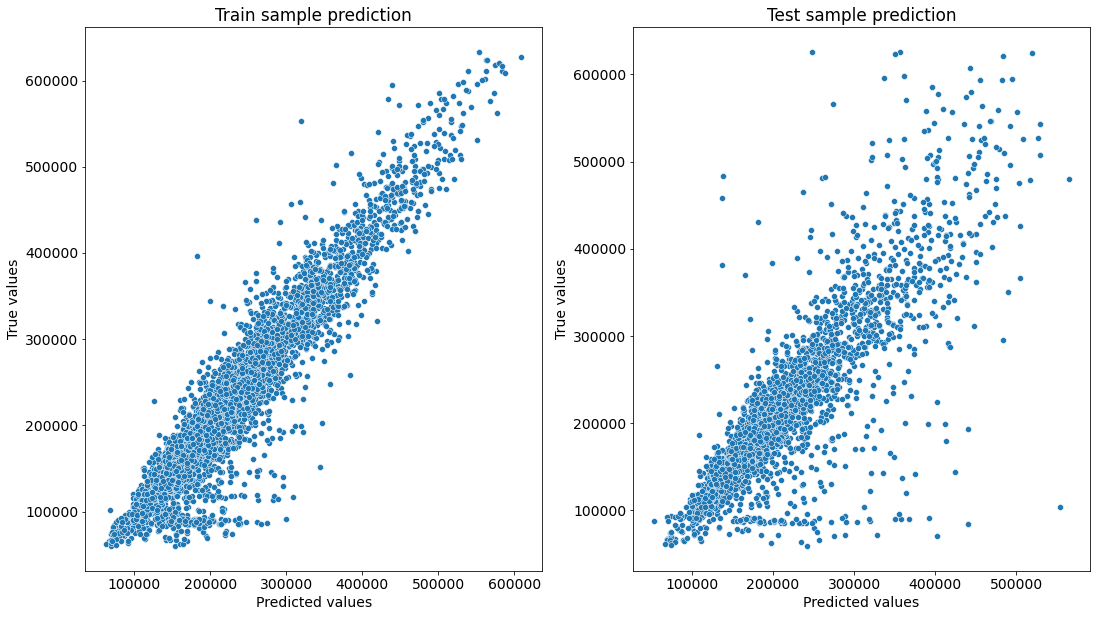

In [18]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [20]:
feature_importances = pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
0,Rooms,0.270752
1,Square,0.206791
9,Social_2,0.090066
10,Social_3,0.083781
8,Social_1,0.064343
3,KitchenSquare,0.051931
7,Ecology_1,0.051875
6,HouseYear,0.035034
5,HouseFloor,0.034141
2,LifeSquare,0.032160


In [34]:
median = test_data['LifeSquare'].median() 
test_data['LifeSquare'].fillna(median, inplace=True) #заменил пропуски на медиану
median = test_data['Healthcare_1'].median() 
test_data['Healthcare_1'].fillna(median, inplace=True)

In [36]:
test_data = pd.concat([test_data, pd.get_dummies(test_data['Ecology_3'])], axis=1)
test_data = test_data.rename(columns={"A": "Ecology_3_A", "B": "Ecology_3_B"})
test_data = pd.concat([test_data, pd.get_dummies(test_data['Ecology_2'])], axis=1)
test_data = test_data.rename(columns={"A": "Ecology_2_A", "B": "Ecology_2_B"})
test_data = pd.concat([test_data, pd.get_dummies(test_data['Shops_2'])], axis=1)
test_data = test_data.rename(columns={"A": "Shops_2_A", "B": "Shops_2_B"})
test_data = test_data.drop(columns=["Ecology_2", "Ecology_3", 'Shops_2'], axis = 1)
test_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_3_A,Ecology_3_B,Ecology_2_A,Ecology_2_B,Shops_2_A,Shops_2_B
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,...,0,1036.0,1,1,0,1,0,1,0,1
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,...,1,900.0,0,0,0,1,0,1,1,0
2,960,27,2.0,59.463678,32.925087,9.0,19,19.0,1977,0.211401,...,0,900.0,0,1,0,1,0,1,0,1
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,...,0,900.0,0,0,0,1,0,1,0,1
4,746,74,1.0,53.837056,32.925087,1.0,8,17.0,1977,0.309479,...,4,990.0,0,6,0,1,0,1,0,1


In [38]:
#feature_name = test_data[feature_names].select_dtypes(include=['float64', 'int64']).columns.tolist()
#feature_name

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']

In [39]:
#test_data[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [41]:
test_data = test_data.drop(columns=["Id", "DistrictId"], axis = 1)

In [43]:
test_preds = gb_model.predict(test_data)

In [44]:
test_preds

array([282296.2729899 , 171231.45985202, 287893.49614155, ...,
       168362.51868297, 291231.7261219 , 126245.74842228])

In [49]:
test_data_df_Id = pd.read_csv(test_data, sep=',')
df.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,1.372430,-0.123874,-0.153787,1.093008,-0.697820,-0.580238,-0.009876,-0.365385,-0.782164,-0.563985,...,-0.169125,-0.884336,-0.880977,-0.099165,0.099165,-0.168182,0.168182,-0.29931,0.29931,305018.871089
1,-1.095219,-0.882520,-0.774365,0.585190,-0.131671,-0.920885,-0.010115,-0.003183,0.301856,0.212626,...,0.209667,-0.214562,-0.880977,-0.099165,0.099165,-0.168182,0.168182,-0.29931,0.29931,177734.553407
2,1.372430,1.422109,0.807595,1.093008,-1.075252,0.612026,-0.010006,-0.783881,0.473017,-0.023603,...,-1.052528,1.124987,-0.672930,-0.099165,0.099165,-0.168182,0.168182,-0.29931,0.29931,282078.720850
3,-1.095219,-0.847966,-0.153787,-1.192176,0.434477,1.463643,-0.010060,-0.939191,-1.352700,-1.271426,...,-0.169125,-0.884336,-0.672930,-0.099165,0.099165,-0.168182,0.168182,-0.29931,0.29931,168106.007630
4,0.138605,0.580853,0.219465,0.839099,1.566775,0.441702,-0.010085,1.376781,0.473017,0.826924,...,-0.169125,-0.884336,0.367303,-0.099165,0.099165,-0.168182,0.168182,-0.29931,0.29931,343995.102962


In [51]:
test_id = test_data_df_Id["Id"]
pred_df = pd.DataFrame()
pred_df["Id"] = test_id
pred_df["Price"] = test_preds
assert pred_df.shape[0] == 5000, f"Real pred-shape = {pred_df.shape[0]}, Expected pred-shape = 5000"

pred_df.to_csv("C:/Users/GrIg2/Desktop/predictions.csv", index=False)